In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install umap-learn scprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.7 MB/s 
     |████████████████████████████████| 93 kB 1.9 MB/s 
     |████████████████████████████████| 1.1 MB 48.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=44b92082470eec34d7098ac8602b38e3c38e07d5a9c28e4a1ead635dc5731882
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=148661ad282f37770542d17b98ab7b972486dab638401fe9b6429db6ec32a670
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [3]:
import numpy as np
import pandas as pd


In [4]:
clusters_1 = pd.read_csv('/content/drive/MyDrive/MCF7 PRO/clusterer_MCF7_HDBSCAN.csv')
clusters_1

,Unnamed: 0,0
0,0,4
1,1,7
2,2,4
3,3,4
4,4,4
...,...,...
358,358,-1
359,359,5
360,360,-1
361,361,-1


In [5]:
phenix_impu=  pd.read_csv('/content/drive/MyDrive/MCF7 PRO/X_phenix_Imputed.csv')
phenix_impu

,Unnamed: 0,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,...,RP11-254F7.3,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P
0,D6_1,0.052523,0.017098,0.043615,0.020654,1.030425e-05,0.000053,0.103538,0.502454,0.474567,...,0.0,0.000034,3.651056e-06,3.239249e-07,0.000091,1.143015e-05,0.0,8.059662e-07,0.0,0.010823
1,D6_2,0.027384,0.007523,0.030097,0.009427,7.909640e-03,0.011676,0.083795,0.426411,0.552883,...,0.0,0.001069,4.829637e-04,2.471712e-05,0.001147,5.899957e-04,0.0,2.384558e-04,0.0,0.001168
2,D6_3,0.057400,0.014494,0.044388,0.009531,1.694272e-06,0.000015,0.098356,0.504129,0.454362,...,0.0,0.000014,1.723873e-06,1.893597e-08,0.000017,5.390703e-06,0.0,4.286652e-07,0.0,0.008680
3,D6_4,0.054447,0.015051,0.048107,0.004018,1.272801e-06,0.000014,0.118475,0.506054,0.436026,...,0.0,0.000022,1.075921e-06,1.435462e-08,0.000005,3.149943e-06,0.0,3.976802e-07,0.0,0.006867
4,D6_5,0.050394,0.024274,0.042955,0.005580,7.714233e-07,0.000006,0.139241,0.474659,0.460883,...,0.0,0.000004,9.951884e-08,2.111687e-09,0.000004,5.325036e-07,0.0,2.117942e-08,0.0,0.010574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,D19_226,0.050244,0.008892,0.052569,0.030086,6.920303e-04,0.002037,0.084013,0.493632,0.488301,...,0.0,0.001175,3.047087e-04,6.183099e-05,0.001340,4.344010e-04,0.0,1.624488e-04,0.0,0.007538
359,D19_227,0.024083,0.009036,0.043992,0.016116,7.130897e-04,0.005166,0.108184,0.427763,0.542148,...,0.0,0.004017,1.927074e-03,3.573354e-03,0.000962,1.216686e-03,0.0,2.517982e-03,0.0,0.000587
360,D19_228,0.011238,0.014383,0.042904,0.024610,5.713210e-05,0.002247,0.154149,0.395429,0.513210,...,0.0,0.001913,1.813175e-04,7.063864e-03,0.000191,8.713082e-05,0.0,5.527877e-04,0.0,0.000102
361,D19_229,0.024309,0.040204,0.030939,0.002952,5.253685e-05,0.001106,0.076849,0.447349,0.356563,...,0.0,0.003655,2.374254e-04,9.334531e-04,0.000402,2.372314e-04,0.0,2.680365e-04,0.0,0.000102


In [6]:
scores_df = pd.read_csv('/content/drive/MyDrive/MCF7 PRO/3DPCA.csv')

In [7]:
#VEGFA
#ALDH1A1
#PAR1
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(scores_df, x='PC1', y='PC2', z='PC3',
              color=phenix_impu['F3'])
fig.update_layout(title_text=".              HDBSCAMcluster",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='#E5E5E5')))
fig.update_layout(scene_aspectmode='cube')
fig.update_traces(marker=dict(size=3))

In [8]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(scores_df, x='PC1', y='PC2', z='PC3',
              color=clusters_1['0'].astype('category'), color_discrete_sequence=
              px.colors.qualitative.Light24)
fig.update_layout(title_text=".              HDBSCAMcluster",
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#E5E5E5'
                                          ),
                               zaxis=dict(backgroundcolor='white',
                                          color='black', 
                                          gridcolor='#E5E5E5')))
fig.update_layout(scene_aspectmode='cube')
fig.update_traces(marker=dict(size=3))

**EDM**

In [9]:
phenix_impu= phenix_impu.drop('Unnamed: 0',axis=1)
exp_diff = phenix_impu


In [10]:
clusters = clusters_1['0'].astype('str')
clusters

0       4
1       7
2       4
3       4
4       4
       ..
358    -1
359     5
360    -1
361    -1
362     2
Name: 0, Length: 363, dtype: object

In [11]:
exp_diff['clusters'] = clusters

In [12]:
exp_diff

,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AADAC,...,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P,clusters
0,0.052523,0.017098,0.043615,0.020654,1.030425e-05,0.000053,0.103538,0.502454,0.474567,0.007013,...,0.000034,3.651056e-06,3.239249e-07,0.000091,1.143015e-05,0.0,8.059662e-07,0.0,0.010823,4
1,0.027384,0.007523,0.030097,0.009427,7.909640e-03,0.011676,0.083795,0.426411,0.552883,0.000181,...,0.001069,4.829637e-04,2.471712e-05,0.001147,5.899957e-04,0.0,2.384558e-04,0.0,0.001168,7
2,0.057400,0.014494,0.044388,0.009531,1.694272e-06,0.000015,0.098356,0.504129,0.454362,0.012016,...,0.000014,1.723873e-06,1.893597e-08,0.000017,5.390703e-06,0.0,4.286652e-07,0.0,0.008680,4
3,0.054447,0.015051,0.048107,0.004018,1.272801e-06,0.000014,0.118475,0.506054,0.436026,0.015727,...,0.000022,1.075921e-06,1.435462e-08,0.000005,3.149943e-06,0.0,3.976802e-07,0.0,0.006867,4
4,0.050394,0.024274,0.042955,0.005580,7.714233e-07,0.000006,0.139241,0.474659,0.460883,0.015347,...,0.000004,9.951884e-08,2.111687e-09,0.000004,5.325036e-07,0.0,2.117942e-08,0.0,0.010574,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,0.050244,0.008892,0.052569,0.030086,6.920303e-04,0.002037,0.084013,0.493632,0.488301,0.001540,...,0.001175,3.047087e-04,6.183099e-05,0.001340,4.344010e-04,0.0,1.624488e-04,0.0,0.007538,-1
359,0.024083,0.009036,0.043992,0.016116,7.130897e-04,0.005166,0.108184,0.427763,0.542148,0.006494,...,0.004017,1.927074e-03,3.573354e-03,0.000962,1.216686e-03,0.0,2.517982e-03,0.0,0.000587,5
360,0.011238,0.014383,0.042904,0.024610,5.713210e-05,0.002247,0.154149,0.395429,0.513210,0.021280,...,0.001913,1.813175e-04,7.063864e-03,0.000191,8.713082e-05,0.0,5.527877e-04,0.0,0.000102,-1
361,0.024309,0.040204,0.030939,0.002952,5.253685e-05,0.001106,0.076849,0.447349,0.356563,0.002082,...,0.003655,2.374254e-04,9.334531e-04,0.000402,2.372314e-04,0.0,2.680365e-04,0.0,0.000102,-1


In [13]:

exp_diff[exp_diff['clusters'] == 1]
exp_diff['clusters'] != -1
exp_diff_ok = exp_diff[exp_diff['clusters']  != '-1']
exp_diff_ok
EXP = exp_diff_ok.iloc[:,:23922]
EXP

,RN7SK,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A4GALT,AAAS,AACS,AADAC,...,RP11-254F7.3,TAS2R12P,OR2A20P,HMCN2,RP11-38O14.6,CHSY3,RP3-395C13.1,CTD-2020K17.1,KRT18P46,RNU6ATAC35P
0,0.052523,0.017098,0.043615,0.020654,1.030425e-05,0.000053,0.103538,0.502454,0.474567,0.007013,...,0.0,0.000034,3.651056e-06,3.239249e-07,0.000091,1.143015e-05,0.0,8.059662e-07,0.0,0.010823
1,0.027384,0.007523,0.030097,0.009427,7.909640e-03,0.011676,0.083795,0.426411,0.552883,0.000181,...,0.0,0.001069,4.829637e-04,2.471712e-05,0.001147,5.899957e-04,0.0,2.384558e-04,0.0,0.001168
2,0.057400,0.014494,0.044388,0.009531,1.694272e-06,0.000015,0.098356,0.504129,0.454362,0.012016,...,0.0,0.000014,1.723873e-06,1.893597e-08,0.000017,5.390703e-06,0.0,4.286652e-07,0.0,0.008680
3,0.054447,0.015051,0.048107,0.004018,1.272801e-06,0.000014,0.118475,0.506054,0.436026,0.015727,...,0.0,0.000022,1.075921e-06,1.435462e-08,0.000005,3.149943e-06,0.0,3.976802e-07,0.0,0.006867
4,0.050394,0.024274,0.042955,0.005580,7.714233e-07,0.000006,0.139241,0.474659,0.460883,0.015347,...,0.0,0.000004,9.951884e-08,2.111687e-09,0.000004,5.325036e-07,0.0,2.117942e-08,0.0,0.010574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,0.031427,0.008650,0.031795,0.015034,7.262010e-05,0.009797,0.097341,0.436337,0.520177,0.003728,...,0.0,0.003332,2.481122e-03,5.939978e-03,0.000937,1.592096e-03,0.0,2.623073e-03,0.0,0.000109
355,0.022028,0.046208,0.028053,0.001608,2.075446e-05,0.000461,0.069420,0.451355,0.314964,0.001359,...,0.0,0.002866,7.224125e-05,4.275921e-04,0.000190,8.648018e-05,0.0,9.005226e-05,0.0,0.000054
357,0.023206,0.043852,0.028643,0.001593,3.767614e-05,0.000406,0.073085,0.455355,0.316926,0.001142,...,0.0,0.002631,6.419889e-05,2.434435e-04,0.000162,9.073691e-05,0.0,7.222128e-05,0.0,0.000090
359,0.024083,0.009036,0.043992,0.016116,7.130897e-04,0.005166,0.108184,0.427763,0.542148,0.006494,...,0.0,0.004017,1.927074e-03,3.573354e-03,0.000962,1.216686e-03,0.0,2.517982e-03,0.0,0.000587


In [14]:
cluster = exp_diff_ok['clusters']

In [17]:
#TODOS CONTRA TODOS
import scprep
x=scprep.stats.differential_expression_by_cluster(EXP, cluster, measure='emd', direction='both', gene_names=None, n_jobs=-2)

In [19]:
differential_expression_by_cluster = x
differential_expression_by_cluster

{'0':                     emd   rank
 MT-RNR2        5.668488      0
 MT-ND4         5.305992      1
 MT-CO2         4.492841      2
 MT-CO1         4.006456      3
 MT-CYB         3.903149      4
 ...                 ...    ...
 RP11-993B23.3  0.000000  23917
 OTUD7A         0.000000  23918
 DPY19L2        0.000000  23919
 C10ORF67       0.000000  23920
 RP13-228J13.6  0.000000  23921
 
 [23922 rows x 2 columns], '1':                     emd   rank
 MT-RNR2        6.169987      0
 MT-ND4         5.134280      1
 MT-CO2         4.423052      2
 MT-CO1         3.828350      3
 MT-CYB         3.763302      4
 ...                 ...    ...
 RP13-93L13.1   0.000000  23917
 RP3-323K23.3   0.000000  23918
 RP3-323P24.3   0.000000  23919
 RP3-332B22.1   0.000000  23920
 RP11-692C23.1  0.000000  23921
 
 [23922 rows x 2 columns], '10':                    emd   rank
 FTH1          3.325129      0
 MT-ND4       -1.781464      1
 TPT1          1.649345      2
 FTL           1.609268      3
 MT-R

In [ ]:
x

{'4':              emd   rank
 TUBA1B  3.129044      0
 RRM2    2.032108      1
 H2AZ1   1.974950      2
 ACTG1   1.932443      3
 HMGB2   1.567650      4
 ...          ...    ...
 NEAT1  -2.002084  23917
 TFF1   -2.045606  23918
 CSTB   -2.146642  23919
 S100A9 -2.334564  23920
 FTH1   -3.749858  23921
 
 [23922 rows x 2 columns], '5':              emd   rank
 FTH1    4.313775      0
 S100A9  3.112844      1
 TFF1    2.967682      2
 CSTB    2.941927      3
 IFI6    2.538267      4
 ...          ...    ...
 RRM2   -1.625469  23917
 RPS2   -1.635625  23918
 H2AZ1  -1.689729  23919
 ACTG1  -1.854307  23920
 TUBA1B -2.591545  23921
 
 [23922 rows x 2 columns], '7':              emd   rank
 TPT1    1.818322      0
 SCD     1.547609      1
 NEAT1   1.083222      2
 RPS6    0.954665      3
 RPS12   0.834028      4
 ...          ...    ...
 S100A9 -1.320159  23917
 TFF1   -1.507027  23918
 IFI6   -1.654283  23919
 TUBA1B -1.761393  23920
 FTH1   -2.015553  23921
 
 [23922 rows x 2 columns]}

In [20]:
emd = pd.DataFrame([       x['0']['emd'].rename('0'),      x['1']['emd'].rename('1'),
               x['2']['emd'].rename('2')  , x['3']['emd'].rename('3') ,
                 x['4']['emd'].rename('4') ,  x['5']['emd'].rename('5') , 
                 x['6']['emd'].rename('6')  , x['7']['emd'].rename('7'), 
                 x['8']['emd'].rename('8'), x['9']['emd'].rename('9'),x['10']['emd'].rename('10')])

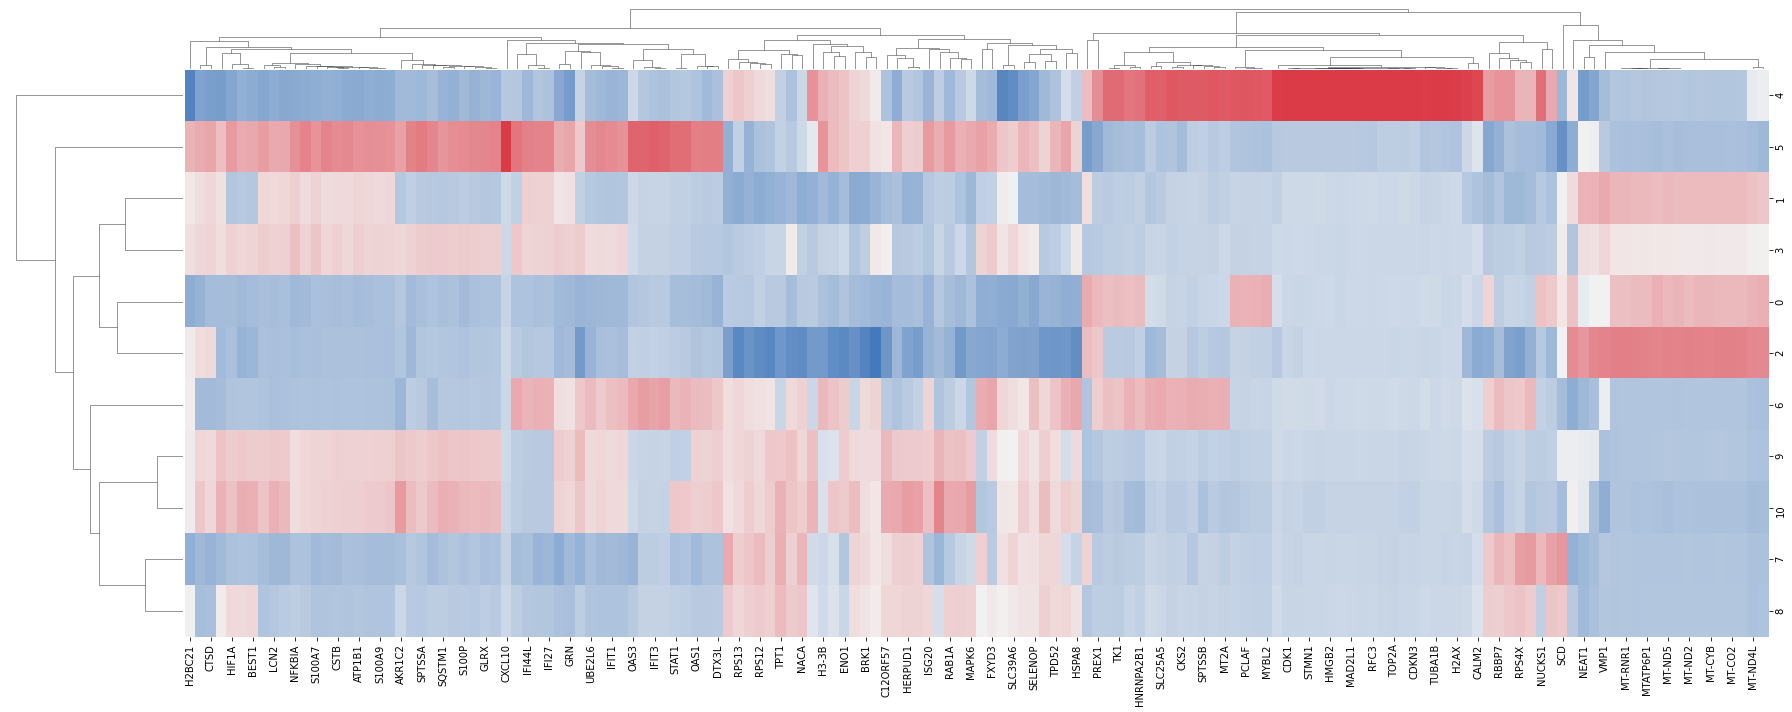

In [21]:
import seaborn as sns
sns.clustermap(emd.iloc[:,:150],cmap=sns.diverging_palette(250, 10, as_cmap=True),z_score=1,figsize=(25, 10),dendrogram_ratio=0.1,cbar_pos=None)